In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [66]:
# dVdt = (gammaV * I) - (gammaVA * S * A * V) - (gammaVH * H * V) - (alphaV * V) - ((aV1 * V)/(1 + (aV2 * V)))
# dHdt = ((bHD * D) * (H + R)) + (R * R) - (gammaHV * V * H) - (bHF * F * H)
# dIdt = (gammaHV * V * H) - (bIE * E * I) - (a1 * I)
# dMdt = (((bMD * D) + (bMV * V)) * (1 - M)) - (aM * M)
# dFdt = (bF * M) + (cF * I) - (bFH * H * F) - (aF * F)
# dRdt = (bHF * F * H) - (aR * R)
# dEdt = (bEM * M * E) - (bEI * I * E) + (aE * (1 - E))
# dPdt = (bPM * M * P) + (aP * (1 - P))
# dAdt = (bA * P) - (gammaAV * S * A * V) - (aA * A)

In [2]:
gammaV = 510
gammaVA = 619.2
gammaVH = 1.02
alphaV = 1.7
aV1 = 100
aV2 = 23000
bHD = 4
aR = 1
gammaHV = 0.34
bHF = 0.01
bIE = 0.066
aI = 1.5
bMD = 1
bMV = 0.0037
aM = 1
bF = 250000
cF = 2000
bFH = 17
aF = 8
bEM = 8.8
bEI = 2.72
aE = 0.4
bPM = 11.5
aP = 0.4
bA = 0.043
gammaAV = 146.2
aA = 0.043
r = 3e-5

In [3]:
# standard behavior
V0 = 0.01
H0 = 1
I0 = 0
M0 = 0
F0 = 0
R0 = 0
E0 = 1
P0 = 1
A0 = 1
S0 = 0.1

In [4]:
def deriv_std(state, t):
    V, H, I, M, F, R, E, P, A, S = state
    D = 1 - H - R - I

    dVdt = (gammaV * I) - (gammaVA * S * A * V) - (gammaVH * H * V) - (alphaV * V) - ((aV1 * V)/(1 + (aV2 * V)))
    dHdt = ((bHD * D) * (H + R)) + (aR * R) - (gammaHV * V * H) - (bHF * F * H)
    dIdt = (gammaHV * V * H) - (bIE * E * I) - (aI * I)
    dMdt = (((bMD * D) + (bMV * V)) * (1 - M)) - (aM * M)
    dFdt = (bF * M) + (cF * I) - (bFH * H * F) - (aF * F)
    dRdt = (bHF * F * H) - (aR * R)
    dEdt = (bEM * M * E) - (bEI * I * E) + (aE * (1 - E))
    dPdt = (bPM * M * P) + (aP * (1 - P))
    dAdt = (bA * P) - (gammaAV * S * A * V) - (aA * A)
    dSdt = (r * P) * (1 - S)

    return np.array([dVdt, dHdt, dIdt, dMdt, dFdt, dRdt, dEdt, dPdt, dAdt, dSdt])


t = np.linspace(0, 15, 1000)

state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0]

state = odeint(deriv_std, state0, t)

V, H, I, M, F, R, E, P, A, S = state.T

D = 1 - H - R - I

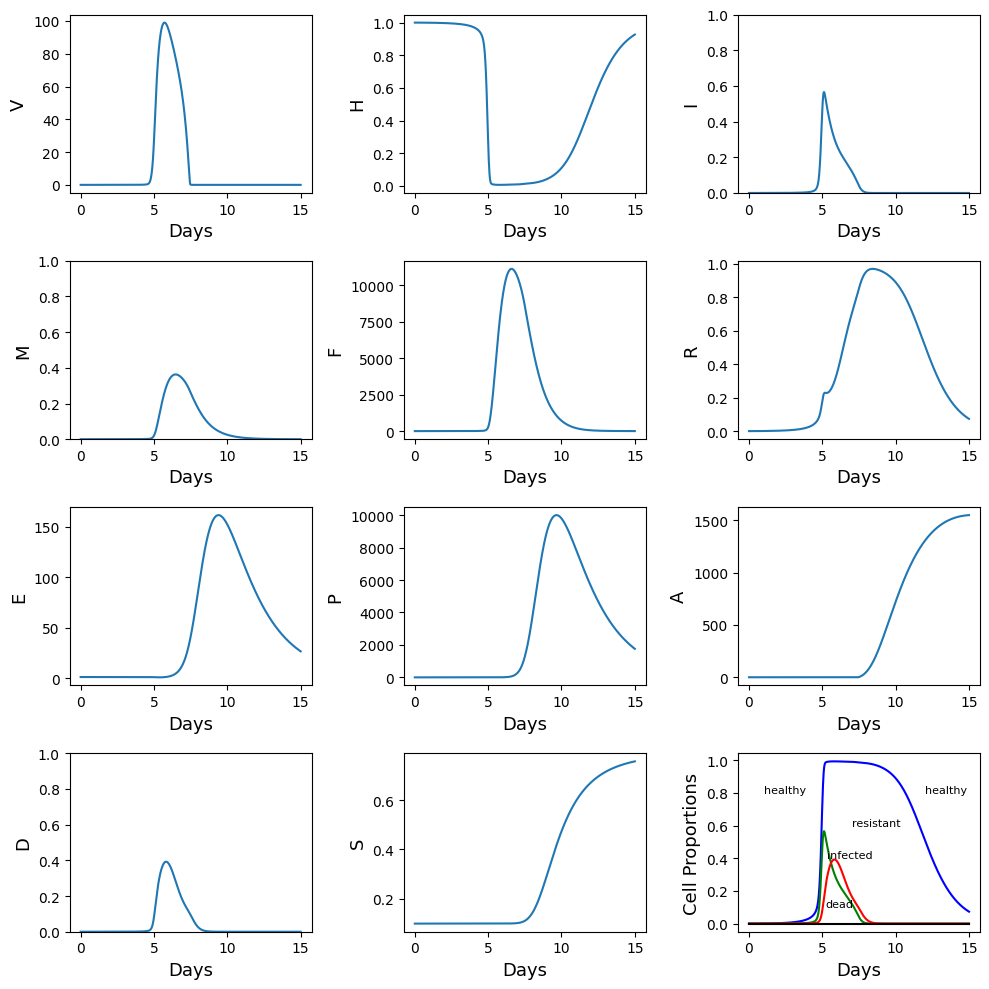

In [5]:
# FIGURE 1


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(5, 10))
fig.set_figwidth(10)

axes[0, 0].plot(t, V)
axes[0, 0].set_xlabel('Days', fontsize = 13)
axes[0, 0].set_ylabel('V', fontsize = 13)

axes[0, 1].plot(t, H)
axes[0, 1].set_xlabel('Days', fontsize = 13)
axes[0, 1].set_ylabel('H', fontsize = 13)

axes[0, 2].plot(t, I)
axes[0, 2].set_xlabel('Days', fontsize = 13)
axes[0, 2].set_ylabel('I', fontsize = 13)
axes[0, 2].set_ylim(0, 1)

axes[1, 0].plot(t, M)
axes[1, 0].set_xlabel('Days', fontsize = 13)
axes[1, 0].set_ylabel('M', fontsize = 13)
axes[1, 0].set_ylim(0, 1)

axes[1, 1].plot(t, F)
axes[1, 1].set_xlabel('Days', fontsize = 13)
axes[1, 1].set_ylabel('F', fontsize = 13)

axes[1, 2].plot(t, R)
axes[1, 2].set_xlabel('Days', fontsize = 13)
axes[1, 2].set_ylabel('R', fontsize = 13)

axes[2, 0].plot(t, E)
axes[2, 0].set_xlabel('Days', fontsize = 13)
axes[2, 0].set_ylabel('E', fontsize = 13)

axes[2, 1].plot(t, P)
axes[2, 1].set_xlabel('Days', fontsize = 13)
axes[2, 1].set_ylabel('P', fontsize = 13)

axes[2, 2].plot(t, A)
axes[2, 2].set_xlabel('Days', fontsize = 13)
axes[2, 2].set_ylabel('A', fontsize = 13)

axes[3, 0].plot(t, D)
axes[3, 0].set_xlabel('Days', fontsize = 13)
axes[3, 0].set_ylabel('D', fontsize = 13)
axes[3, 0].set_ylim(0, 1)

axes[3, 1].plot(t, S)
axes[3, 1].set_xlabel('Days', fontsize = 13)
axes[3, 1].set_ylabel('S', fontsize = 13)

axes[3, 2].plot(t, np.max(H) - H, color = 'blue')
axes[3, 2].plot(t, I, color = 'green')
axes[3, 2].plot(t, D, color = 'red')
axes[3, 2].plot(t, np.zeros(t.size), color = 'black')
axes[3, 2].set_xlabel('Days', fontsize = 13)
axes[3, 2].text(5.2, 0.1, 'dead', fontsize=8)
axes[3, 2].text(5.3, 0.4, 'infected', fontsize=8)
axes[3, 2].text(7, 0.6, 'resistant', fontsize=8)
axes[3, 2].text(12, 0.8, 'healthy', fontsize=8)
axes[3, 2].text(1, 0.8, 'healthy', fontsize=8)
axes[3, 2].set_ylabel('Cell Proportions', fontsize = 13)

fig.tight_layout()

plt.show()

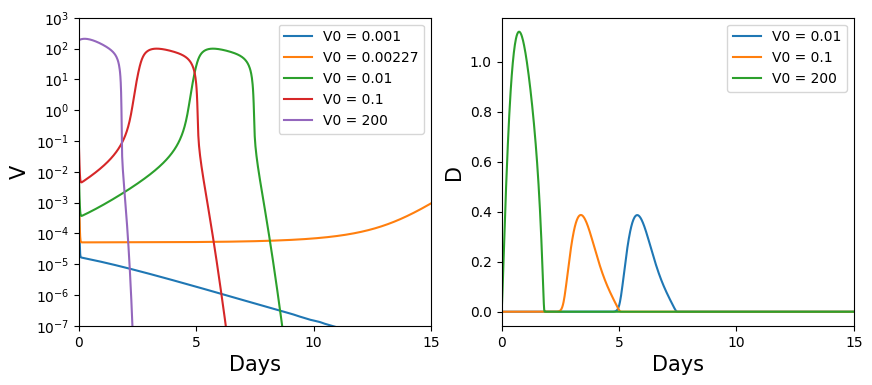

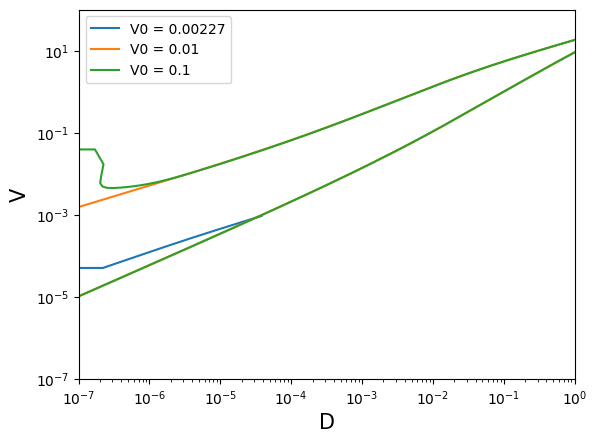

In [74]:
# Figure 3 b
V0_lst = [0.001, 0.00227, 0.01, 0.1, 200]
V_lst = []
D_lst = []

for i in range(len(V0_lst)):
    state0 = [V0_lst[i], H0, I0, M0, F0, R0, E0, P0, A0, S0]
    state = odeint(deriv_std, state0, t)

    V = state[:, 0]
    H = state[:, 1]
    I = state[:, 2]
    R = state[:, 5]

    D = 1 - H - R - I
    D_V = D * V

    V_lst.append(V)
    D_lst.append(D_V)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

for i in range(len(V0_lst)):
    axes[0].plot(t, V_lst[i], label='V0 = {}'.format(V0_lst[i]))
axes[0].set_xlabel('Days', fontsize=15)
axes[0].set_ylabel('V', fontsize=15)
axes[0].set_yscale('log')
yticks = [10**i for i in range(-7, 4)]
axes[0].set_ylim([yticks[0], yticks[-1]])
axes[0].set_yticks(yticks)
xticks = np.arange(0, 16, 5)
axes[0].set_xticks(xticks)
axes[0].set_xlim(0, 15)
axes[0].legend()

for i in range(2, len(V0_lst)):
    axes[1].plot(t, D_lst[i]/100, label='V0 = {}'.format(V0_lst[i]))
axes[1].set_xlabel('Days', fontsize=15)
axes[1].set_ylabel('D', fontsize=15)
xticks = np.arange(0, 16, 5)
axes[1].set_xticks(xticks)
axes[1].set_xlim(0, 15)
axes[1].legend()

plt.show()


# Phase diagram
V_max = 1.3e10
D_max = 36
V1 = V_lst[1]
V2 = V_lst[2]
V3 = V_lst[3]
D1 = D_lst[1]*1000
D2 = D_lst[2]
D3 = D_lst[3]


fig, ax = plt.subplots()
ax.plot(D1, V1, label='V0 = 0.00227')
ax.plot(D2, V2, label='V0 = 0.01')
ax.plot(D3, V3, label='V0 = 0.1')
ax.plot([0, D_max], [V_max, V_max], color='black')
ax.set_xlabel('D', fontsize=15)
ax.set_ylabel('V', fontsize=15)
ax.set_yscale('log')
# yticks = [10**i for i in range(-7, 3)]
ax.set_ylim(10**-7, 10**2)
# ax.set_yticks(yticks)
ax.set_xscale('log')
# xticks = [10**i for i in range(-8, 3)]
ax.set_xlim([10**-7, 10**0])
# ax.set_xticks(xticks)
ax.legend()
plt.show()


